In [1]:
import os


project_dir = os.path.abspath("..")
data_dir = os.path.join(project_dir, "data")
notebook_dir = os.path.join(project_dir, "notebooks")

print("Current data directory is: " + data_dir)

Current data directory is: /home/fishium/course/bio2502/CenProteo/data


## Classical Method

In [2]:
from cenproteo import CC

# Change different method (DC, BC, NC, etc.) in cenproteo to test different classical methods


# Load the PPI data
ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")

# Calculate the score for each protein using CC
class_test = CC(ppi_file)
class_test.calculate()

# compare the essential protein between the result and the ground truth
essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")
essencial_count = class_test.compare_top_n(100, essential_protein)

Graph loaded successfully: 5093 nodes, 24743 edges.
Comparison: Top 100 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 40


## Modern Method

In [3]:
from cenproteo import JDC


# Load the PPI data and gene expression data
ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")
gene_expression = os.path.join(data_dir, "filtered_GE_matrix.csv")

# Calculate the score for each protein using JDC
jdc_calculator = JDC(ppi_file, gene_expression)
jdc_calculator.calculate()

# compare the essential protein between the result and the ground truth
essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")
essencial_count = jdc_calculator.compare_top_n(200, essential_protein)

Graph loaded successfully: 5093 nodes, 24743 edges.
Gene expression data loaded for 6224 genes.
Calculating JDC scores...
Calculating gene expression volatility and active profiles...
Info: Using columns ['GSM77298', 'GSM77299', 'GSM77300', 'GSM77301', 'GSM77302', 'GSM77303', 'GSM77304', 'GSM77305', 'GSM77306', 'GSM77307', 'GSM77308', 'GSM77309', 'GSM77310', 'GSM77311', 'GSM77312', 'GSM77313', 'GSM77314', 'GSM77315', 'GSM77316', 'GSM77317', 'GSM77318', 'GSM77319', 'GSM77320', 'GSM77321', 'GSM77322', 'GSM77323', 'GSM77324', 'GSM77325', 'GSM77326', 'GSM77327', 'GSM77328', 'GSM77329', 'GSM77330', 'GSM77331', 'GSM77332', 'GSM77333'] for expression data.
Active profiles calculated.
Calculating ECC and Jaccard for edges...
Processed 5000/24743 edges...
Processed 10000/24743 edges...
Processed 15000/24743 edges...
Processed 20000/24743 edges...
Processed 24743/24743 edges...
JDC calculation finished.
Comparison: Top 200 predicted proteins vs Gold Standard.
Number of correctly predicted essent

In [4]:
from cenproteo import TEO

# Load the PPI data and gene expression data
ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")
gene_expression = os.path.join(data_dir, "filtered_GE_matrix.csv")

# Calculate the score for each protein using TEO
teo_calculator = TEO(ppi_file, gene_expression)
go_term = "BP"  # You can choose method by changing parameters with "BP" "MF" "CC"
teo_calculator.calculate(go_term=go_term)

# compare the essential protein between the result and the ground truth
essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")
teo_calculator.compare_top_n(100, essential_protein)

PPI and GO similarity data loaded from /home/fishium/course/bio2502/CenProteo/data/DIP_data_with_combined_scores.csv. Shape: (24743, 6)
Graph created successfully from preloaded data: 5093 nodes, 24743 edges (after removing self-loops).
Gene expression data loaded for 6224 genes.
Graph created successfully from preloaded data: 5093 nodes, 24743 edges (after removing self-loops).
Found GO term columns by name.
GO similarity data extracted for 24743 unique pairs (symmetric).
Calculating TEO scores using GO term: BP...
Processed 5000/24743 edges...
Processed 10000/24743 edges...
Processed 15000/24743 edges...
Processed 20000/24743 edges...
Processed 24743/24743 edges...
TEO calculation finished.
Generated TEO scores for 5093 proteins.
Comparison: Top 100 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 67


67

In [5]:
from cenproteo import TGSO


# Load the PPI data, gene expression data, subcellular localization data and gene orthology data
ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")
gene_expression_file = os.path.join(data_dir, "filtered_GE_matrix.csv")
subcellular_localization_file = os.path.join(
    data_dir, "yeast_compartment_knowledge_full.csv"
)
gene_orthology_file = os.path.join(data_dir, "I_score.csv")

# Calculate the score for each protein using TGSO
tgso_calculator = TGSO(
    ppi_file, gene_expression_file, subcellular_localization_file, gene_orthology_file
)
tgso_calculator.calculate()

# compare the essential protein between the result and the ground truth
essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")
tgso_calculator.compare_top_n(100, essential_protein)

Graph loaded successfully: 5093 nodes, 24743 edges.
Gene expression data loaded for 6224 genes.
Data loaded successfully from /home/fishium/course/bio2502/CenProteo/data/yeast_compartment_knowledge_full.csv (subcellular_localization).
Subcellular localization data loaded for 6002 proteins across 69 locations.
Data loaded successfully from /home/fishium/course/bio2502/CenProteo/data/I_score.csv (gene_orthology).
Gene orthology data (O_score) loaded for 5219 proteins.
Calculating sub_scores (Eq 4)...
Calculated sub_scores for 69 locations.
Calculating S_scores (Eq 5)...
Calculated S_scores for 4845 proteins.
Starting TGSO calculation...
Calculating LSG scores...
  Calculated LSG for 500/5093 nodes...
  Calculated LSG for 1000/5093 nodes...
  Calculated LSG for 1500/5093 nodes...
  Calculated LSG for 2000/5093 nodes...
  Calculated LSG for 2500/5093 nodes...
  Calculated LSG for 3000/5093 nodes...
  Calculated LSG for 3500/5093 nodes...
  Calculated LSG for 4000/5093 nodes...
  Calculated

89

## Plot

In [6]:
import cenproteo


# load data
ppi_file = os.path.join(data_dir, "DIP_data_with_combined_scores.csv")
gene_expression = os.path.join(data_dir, "filtered_GE_matrix.csv")
subcellular_localization_file = os.path.join(
    data_dir, "yeast_compartment_knowledge_full.csv"
)
gene_orthology_file = os.path.join(data_dir, "I_score.csv")

essential_protein = os.path.join(data_dir, "extracted_essential_protein.csv")

# algorithms
method_list = [
    "DC",
    "BC",
    "NC",
    "CC",
    "EC",
    "IC",
    "SC",
    "JDC",
    "TEO-BP",
    "TEO-MF",
    "TEO-CC",
    "TGSO",
]
calculator_list = []
## DC
dc = cenproteo.DC(ppi_file)
dc.calculate()
calculator_list.append(dc)
## BC
bc = cenproteo.BC(ppi_file)
bc.calculate()
calculator_list.append(bc)
## NC
nc = cenproteo.NC(ppi_file)
nc.calculate()
calculator_list.append(nc)
## CC
cc = cenproteo.CC(ppi_file)
cc.calculate()
calculator_list.append(cc)
## EC
ec = cenproteo.EC(ppi_file)
ec.calculate()
calculator_list.append(ec)
## IC
ic = cenproteo.IC(ppi_file)
ic.calculate()
calculator_list.append(ic)
## SC
sc = cenproteo.SC(ppi_file)
sc.calculate()
calculator_list.append(sc)
## JDC
jdc = cenproteo.JDC(ppi_file, gene_expression)
jdc.calculate()
calculator_list.append(jdc)
## TEO
teo_bp = cenproteo.TEO(ppi_file, gene_expression)
teo_bp.calculate(go_term="BP")
calculator_list.append(teo_bp)
teo_mf = cenproteo.TEO(ppi_file, gene_expression)
teo_mf.calculate(go_term="MF")
calculator_list.append(teo_mf)
teo_cc = cenproteo.TEO(ppi_file, gene_expression)
teo_cc.calculate(go_term="CC")
calculator_list.append(teo_cc)
## TGSO
tgso = cenproteo.TGSO(
    ppi_file, gene_expression, subcellular_localization_file, gene_orthology_file
)
tgso.calculate()
calculator_list.append(tgso)

Graph loaded successfully: 5093 nodes, 24743 edges.
Graph loaded successfully: 5093 nodes, 24743 edges.
Graph loaded successfully: 5093 nodes, 24743 edges.
Graph loaded successfully: 5093 nodes, 24743 edges.
Graph loaded successfully: 5093 nodes, 24743 edges.
Graph loaded successfully: 5093 nodes, 24743 edges.
Graph loaded successfully: 5093 nodes, 24743 edges.
Graph loaded successfully: 5093 nodes, 24743 edges.
Gene expression data loaded for 6224 genes.
Calculating JDC scores...
Calculating gene expression volatility and active profiles...
Info: Using columns ['GSM77298', 'GSM77299', 'GSM77300', 'GSM77301', 'GSM77302', 'GSM77303', 'GSM77304', 'GSM77305', 'GSM77306', 'GSM77307', 'GSM77308', 'GSM77309', 'GSM77310', 'GSM77311', 'GSM77312', 'GSM77313', 'GSM77314', 'GSM77315', 'GSM77316', 'GSM77317', 'GSM77318', 'GSM77319', 'GSM77320', 'GSM77321', 'GSM77322', 'GSM77323', 'GSM77324', 'GSM77325', 'GSM77326', 'GSM77327', 'GSM77328', 'GSM77329', 'GSM77330', 'GSM77331', 'GSM77332', 'GSM77333']

In [7]:
n_list = [100, 200, 400]
all_counts = {}

for i, method in enumerate(method_list):
    counts = []
    for n in n_list:
        count = calculator_list[i].compare_top_n(n, essential_protein)
        counts.append(count)
    all_counts[method] = counts

Comparison: Top 100 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 44
Comparison: Top 200 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 79
Comparison: Top 400 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 146
Comparison: Top 100 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 42
Comparison: Top 200 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 71
Comparison: Top 400 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 132
Comparison: Top 100 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 52
Comparison: Top 200 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 118
Comparison: Top 400 predicted proteins vs Gold Standard.
Number of correctly predicted essential proteins: 219
Compar

#### Line Graph

In [8]:
# %pip install matplotlib

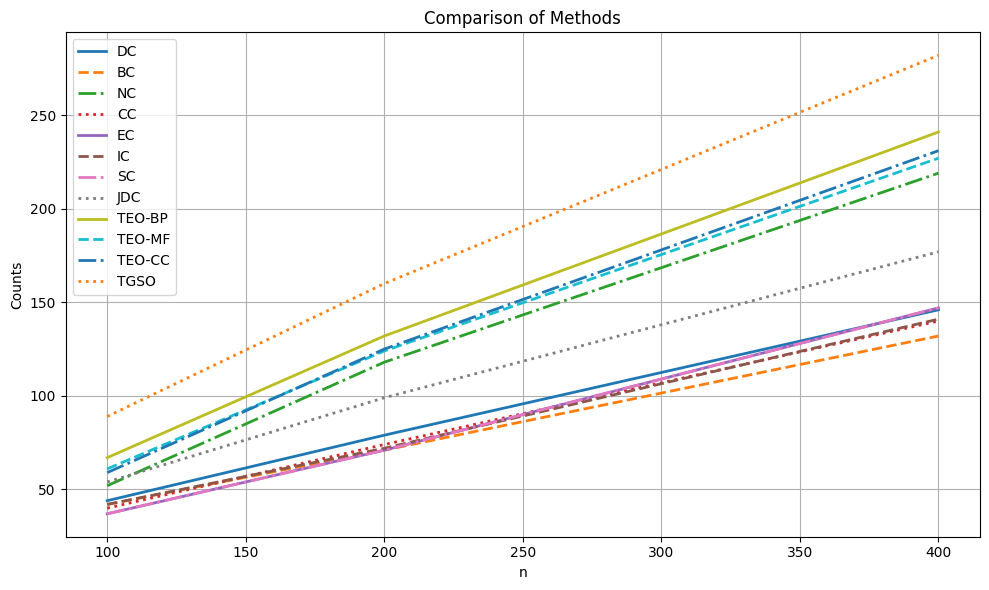

In [9]:
import matplotlib.pyplot as plt


color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
line_styles = ["-", "--", "-.", ":"]

# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# generate line plots for each method
for i, method in enumerate(all_counts):
    counts = all_counts[method]
    color = color_cycle[i % len(color_cycle)]
    line_style = line_styles[i % len(line_styles)]
    ax.plot(
        n_list, counts, label=method, color=color, linestyle=line_style, linewidth=2
    )

ax.set_xlabel("n")
ax.set_ylabel("Counts")
ax.set_title("Comparison of Methods")
ax.legend()
ax.grid(True)

plt.tight_layout()
export_fig = os.path.join(notebook_dir, "comparison.svg")
plt.savefig(export_fig, format="svg")

#### Bar Grapth

/tmp/ipykernel_308307/3044501638.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=45, ha='right') # Rotate x-axis labels
/tmp/ipykernel_308307/3044501638.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=45, ha='right') # Rotate x-axis labels
/tmp/ipykernel_308307/3044501638.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=45, ha='right') # Rotate x-axis labels


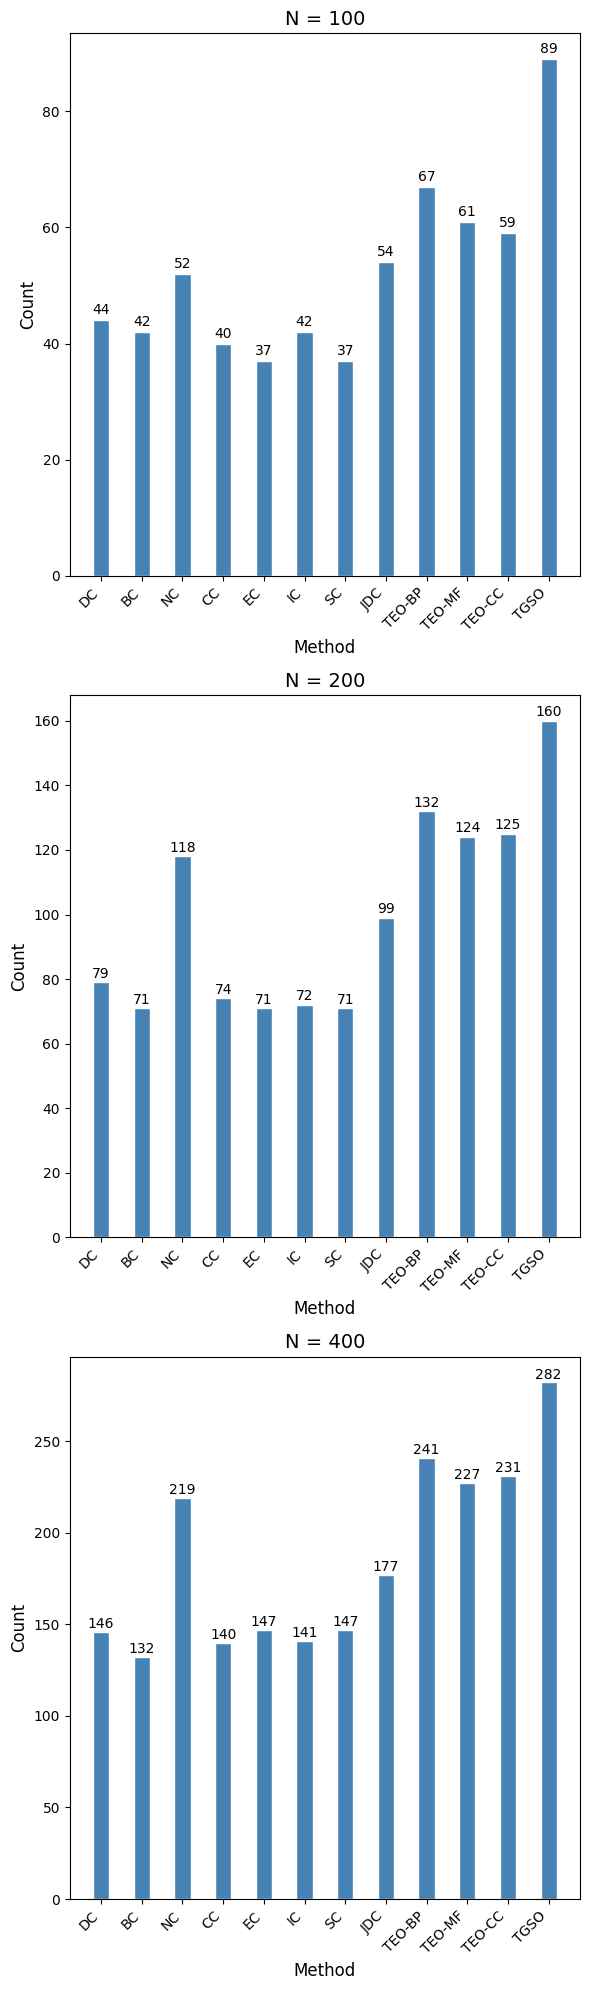

In [10]:
# create a figure and axis
fig, axes = plt.subplots(3, figsize=(6, 20))

# generate bar plots for each method
for i, ax in enumerate(axes):
    method_values = [all_counts[method][i] for method in all_counts.keys()]
    methods = list(all_counts.keys())
    ax.bar(
        methods,
        method_values,
        color="steelblue",
        linewidth=1,
        edgecolor="white",
        width=0.4,
    )
    ax.set_xticklabels(methods, rotation=45, ha='right') # Rotate x-axis labels
    ax.set_xlabel("Method", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"N = {n_list[i]}", fontsize=14)

    # add value labels on top of the bars
    for j, v in enumerate(method_values):
        ax.text(j, v + 0.5, str(v), ha="center", va="bottom")


plt.tight_layout()
export_fig = os.path.join(notebook_dir, "different_n_counts.svg")
plt.savefig(export_fig, format="svg")